## Maciej Olszewski

This is a jupyter notebook wrapper to run detect-classify traffic signs app.

In [29]:
import os
import cv2

import matplotlib.pyplot as plt
import numpy as np

from detect import Detector, NoDetectionsException
from classify import Classifier

In [58]:
from datetime import datetime
# DIR_TEST_IMAGES = "/Users/machofv/Downloads/GTSDB-archive-2/TrainIJCNN2013/TrainIJCNN2013"
DIR_TEST_IMAGES = "/Users/machofv/Downloads/GTSDB-archive-2/TestIJCNN2013/TestIJCNN2013Download"

DIR_RESULTS = f"{os.path.abspath('')}/../results/{datetime.today()}"

In [59]:
os.makedirs(DIR_RESULTS, exist_ok=True)

In [63]:
def enhance_contrast_adaptive(img, clip_limit=2.0, tile_grid_size=(8, 8)):
    img_yuv = cv2.cvtColor(img, cv2.COLOR_BGR2YUV)
    clahe = cv2.createCLAHE(clipLimit=clip_limit, tileGridSize=tile_grid_size)
    img_yuv[:, :, 0] = clahe.apply(img_yuv[:, :, 0])  # Apply CLAHE to the Y (luminance) channel
    img_enhanced = cv2.cvtColor(img_yuv, cv2.COLOR_YUV2BGR)
    return img_enhanced

def visualize(img, imgs_detected, predictions, j_counter, is_saved=False):
    plt.subplots_adjust(top=0.90)
    fig, axs = plt.subplots(1, 1+len(predictions), figsize=(15, 5))

    axs[0].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    axs[0].set_title('Original image')
    axs[0].axis('off')

    for i, img_disp in enumerate(imgs_detected):
        axs[i+1].imshow(cv2.cvtColor(img_disp, cv2.COLOR_BGR2RGB))
        axs[i+1].set_title(predictions[i])
        axs[i+1].axis("off")
    plt.tight_layout()
    if is_saved:
        plt.savefig(f"{DIR_RESULTS}/result_{j_counter}")
    else:
        plt.show()

def visualize_enhanced(img, imgs_detected, imgs_enhanced, predictions, j_counter, is_saved=False):
    plt.subplots_adjust(top=0.90)
    fig, axs = plt.subplots(2, 1+len(predictions), figsize=(15, 5))

    axs[0][0].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    axs[0][0].set_title('Original image')
    axs[0][0].axis('off')
    axs[1][0].axis("off")

    for i, img_disp in enumerate(imgs_detected):
        axs[0][i+1].imshow(cv2.cvtColor(img_disp, cv2.COLOR_BGR2RGB))
        axs[0][i+1].set_title(predictions[i])
        axs[0][i+1].axis("off")

        axs[1][i+1].imshow(cv2.cvtColor(imgs_enhanced[i], cv2.COLOR_BGR2RGB))
        axs[1][i+1].set_title("(inc. contrast)")
        axs[1][i+1].axis("off")

    plt.tight_layout()
    if is_saved:
        plt.savefig(f"{DIR_RESULTS}/result_{j_counter}")
    else:
        plt.show()
    
def run_from_folder(DIR_IMAGES, detector, classifier, is_enhanced=True, is_saved=False):
    test_imgs = os.listdir(DIR_IMAGES)
    for j, IMG_PATH in enumerate(test_imgs[227:230]):

        imgs_detected = []
        if IMG_PATH == ".DS_Store":
            continue
        try:
            imgs_detected = detector.detect_yolo(f"{DIR_IMAGES}/{IMG_PATH}")
        except NoDetectionsException:
            continue

        predictions = []
        if is_enhanced: imgs_enhanced = []

        if imgs_detected:
            for img_detected in imgs_detected:

                if is_enhanced:
                    # img_enhanced = cv2.convertScaleAbs(img_detected, alpha=1.5, beta=15)
                    img_enhanced = enhance_contrast_adaptive(img_detected)
                    imgs_enhanced.append(img_enhanced)
                    predictions.append(classifier.predict(img_enhanced))
                else:
                    predictions.append(classifier.predict(img_detected))

            NUM_OF_PREDS = len(predictions)
            img = cv2.imread(f"{DIR_IMAGES}/{IMG_PATH}")

            # Visualize the data
            if is_enhanced:
                visualize_enhanced(img, imgs_detected, imgs_enhanced, predictions, j, is_saved=is_saved)
            else:
                visualize(img, imgs_detected, predictions, j, is_saved=is_saved)

In [16]:
detector = Detector()
classifier = Classifier()


0: 384x640 4 Traffic signs, 36.4ms
Speed: 2.8ms preprocess, 36.4ms inference, 16.1ms postprocess per image at shape (1, 3, 384, 640)
1/1 [==============================] - 0s 251ms/step

0: 384x640 2 Traffic signs, 24.5ms
Speed: 2.8ms preprocess, 24.5ms inference, 9.0ms postprocess per image at shape (1, 3, 384, 640)
1/1 [==============================] - 0s 285ms/step

0: 384x640 3 Traffic signs, 21.0ms
Speed: 2.0ms preprocess, 21.0ms inference, 7.6ms postprocess per image at shape (1, 3, 384, 640)
1/1 [==============================] - 0s 177ms/step


<Figure size 640x480 with 0 Axes>

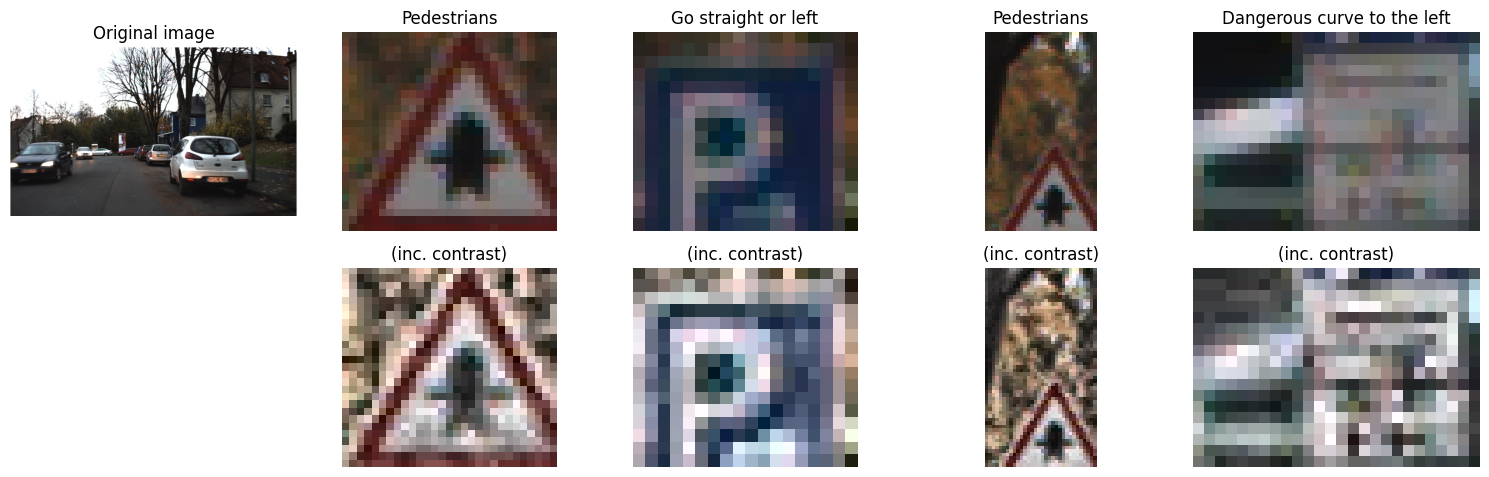

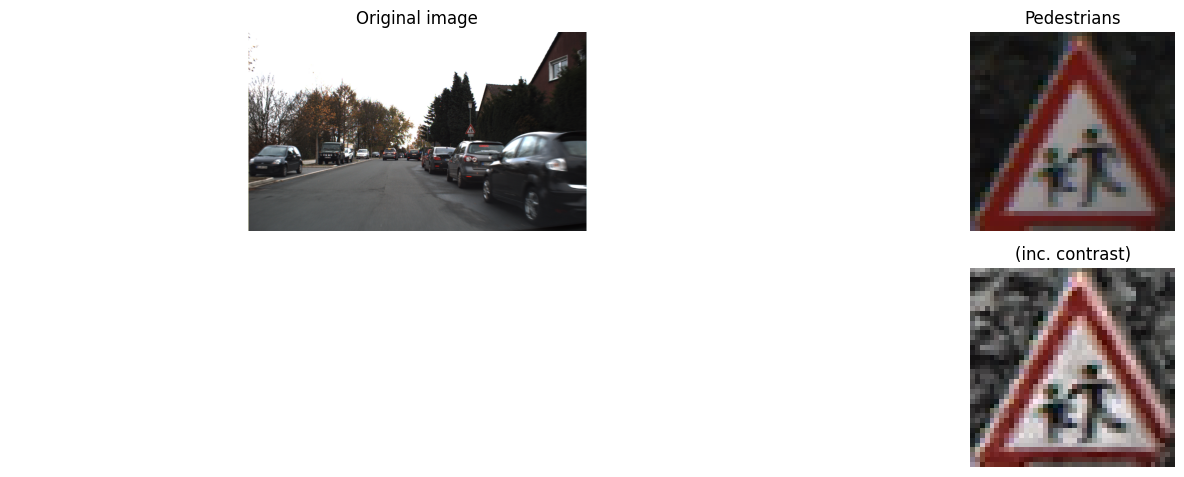

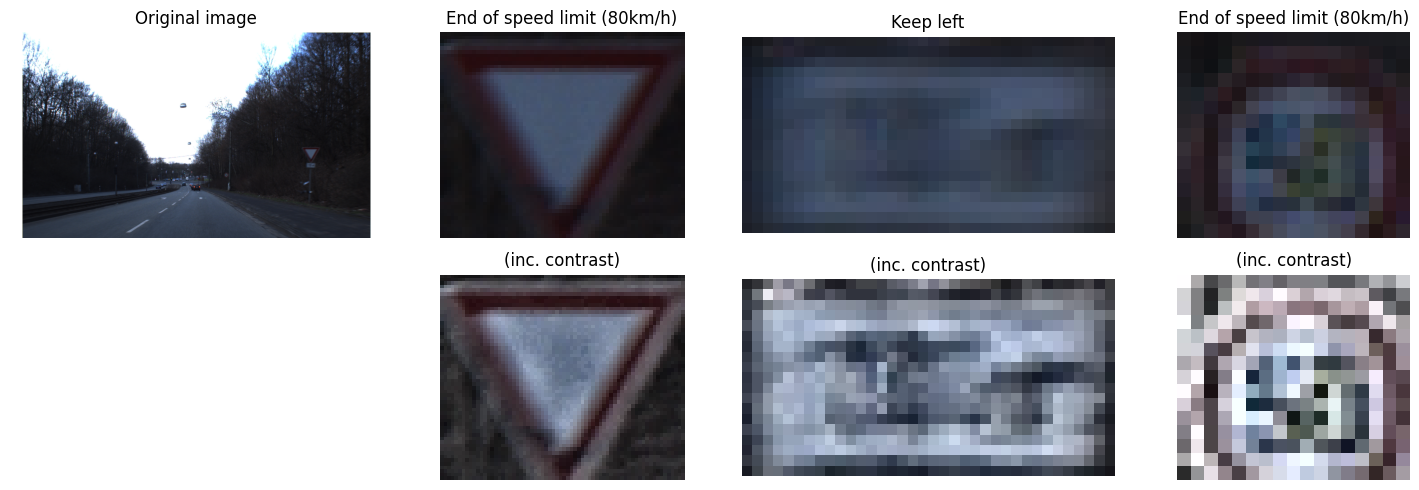

In [64]:
run_from_folder(DIR_TEST_IMAGES, detector, classifier, is_enhanced=True, is_saved=True)

In [40]:
def enhance_contrast_adaptive(img, clip_limit=2.0, tile_grid_size=(8, 8)):
    # img = cv2.imread(image_path)
    img_yuv = cv2.cvtColor(img, cv2.COLOR_BGR2YUV)
    clahe = cv2.createCLAHE(clipLimit=clip_limit, tileGridSize=tile_grid_size)
    img_yuv[:, :, 0] = clahe.apply(img_yuv[:, :, 0])  # Apply CLAHE to the Y (luminance) channel
    img_enhanced = cv2.cvtColor(img_yuv, cv2.COLOR_YUV2BGR)
    return img_enhanced

def run_from_folder_contrast(DIR_IMAGES, detector, classifier, is_enhanced=True):
    test_imgs = os.listdir(DIR_IMAGES)
    for j, IMG_PATH in enumerate(test_imgs):

        imgs_detected = []
        if IMG_PATH == ".DS_Store":
            continue
        try:
            imgs_detected = detector.detect_yolo(f"{DIR_IMAGES}/{IMG_PATH}")
        except NoDetectionsException:
            pass

        predictions = []
        if is_enhanced:
            imgs_enhanced = []
            imgs_enhanced_2 = []

        if imgs_detected:
            for img_detected in imgs_detected:
                
                # Simple contrast correction
                img_enhanced = cv2.convertScaleAbs(img_detected, alpha=1.5, beta=0) # alpha - contrast, beta - brightness
                imgs_enhanced.append(img_enhanced)

                # Apply gamma correction
                # gamma = 1.5  # Gamma value (1.0 is no change)
                # look_up_table = np.empty((1, 256), np.uint8)
                # for i in range(256):
                #     look_up_table[0, i] = np.clip(pow(i / 255.0, gamma) * 255.0, 0, 255)
                # img_enhanced = cv2.LUT(img_detected, look_up_table)
                
                img_enhanced = enhance_contrast_adaptive(img_enhanced)
                imgs_enhanced_2.append(img_enhanced)
                
                predictions.append(classifier.predict(img_enhanced))

            NUM_OF_PREDS = len(predictions)
            img = cv2.imread(f"{DIR_IMAGES}/{IMG_PATH}")

            for i, img_disp in enumerate(imgs_detected):
                plt.figure(figsize=(2, 2))
                plt.imshow(cv2.cvtColor(img_disp, cv2.COLOR_BGR2RGB))
                plt.axis('off')  # Turn off axis labels
                plt.show()

                plt.figure(figsize=(2, 2))
                plt.imshow(cv2.cvtColor(imgs_enhanced[i], cv2.COLOR_BGR2RGB))
                plt.axis('off')  # Turn off axis labels
                plt.show()

                plt.figure(figsize=(2, 2))
                plt.imshow(cv2.cvtColor(imgs_enhanced_2[i], cv2.COLOR_BGR2RGB))
                plt.axis('off')  # Turn off axis labels
                plt.show()
                print(60*"=")


0: 384x640 1 Traffic sign, 28.7ms
Speed: 3.3ms preprocess, 28.7ms inference, 53.0ms postprocess per image at shape (1, 3, 384, 640)
1/1 [==============================] - 0s 251ms/step


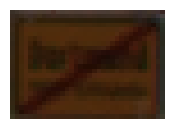

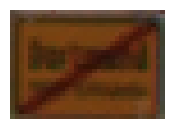

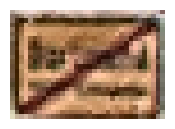


0: 384x640 (no detections), 18.3ms
Speed: 1.9ms preprocess, 18.3ms inference, 2.4ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Traffic sign, 21.1ms
Speed: 1.9ms preprocess, 21.1ms inference, 15.1ms postprocess per image at shape (1, 3, 384, 640)
1/1 [==============================] - 0s 166ms/step


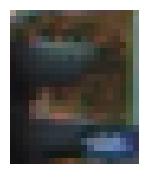

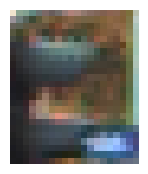

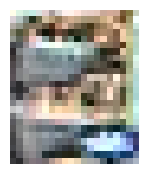


0: 384x640 2 Traffic signs, 22.5ms
Speed: 2.2ms preprocess, 22.5ms inference, 9.3ms postprocess per image at shape (1, 3, 384, 640)
1/1 [==============================] - 0s 190ms/step


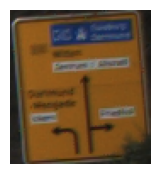

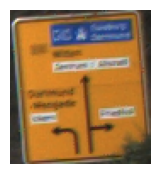

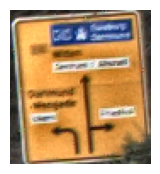

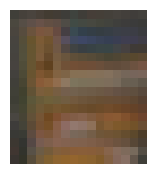

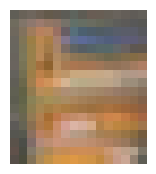

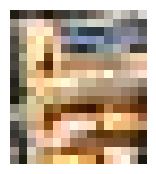


0: 384x640 6 Traffic signs, 22.1ms
Speed: 2.4ms preprocess, 22.1ms inference, 15.2ms postprocess per image at shape (1, 3, 384, 640)
1/1 [==============================] - 0s 277ms/step


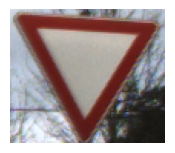

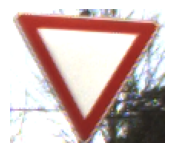

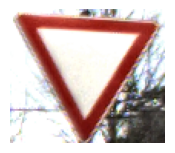

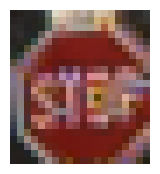

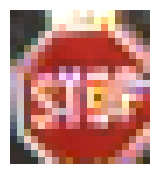

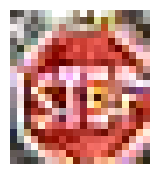

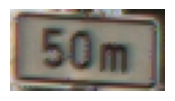

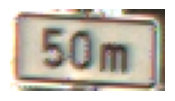

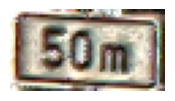

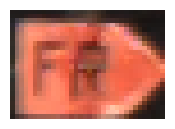

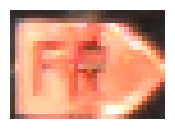

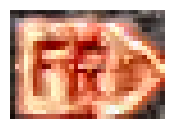


0: 384x640 (no detections), 19.4ms
Speed: 2.6ms preprocess, 19.4ms inference, 2.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 Traffic signs, 22.2ms
Speed: 2.2ms preprocess, 22.2ms inference, 14.0ms postprocess per image at shape (1, 3, 384, 640)
1/1 [==============================] - 0s 155ms/step


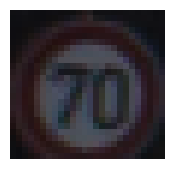

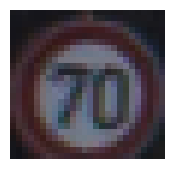

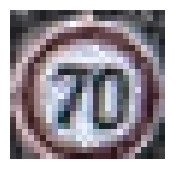

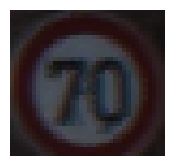

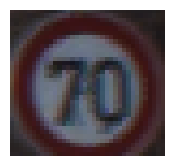

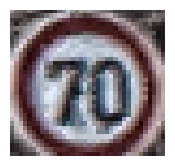

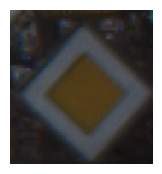

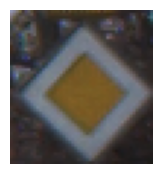

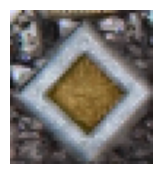


0: 384x640 2 Traffic signs, 19.0ms
Speed: 2.6ms preprocess, 19.0ms inference, 14.6ms postprocess per image at shape (1, 3, 384, 640)
1/1 [==============================] - 0s 192ms/step


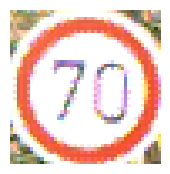

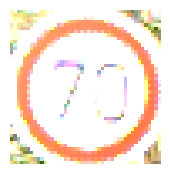

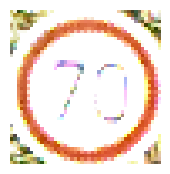

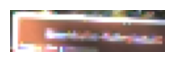

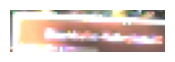

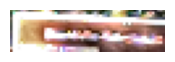


0: 384x640 1 Traffic sign, 23.5ms
Speed: 1.9ms preprocess, 23.5ms inference, 8.9ms postprocess per image at shape (1, 3, 384, 640)
1/1 [==============================] - 0s 170ms/step


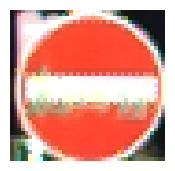

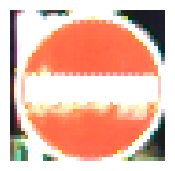

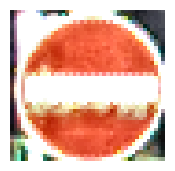


0: 384x640 5 Traffic signs, 18.3ms
Speed: 1.7ms preprocess, 18.3ms inference, 6.5ms postprocess per image at shape (1, 3, 384, 640)
1/1 [==============================] - 0s 187ms/step


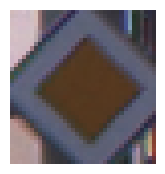

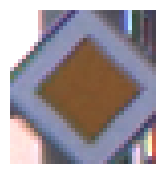

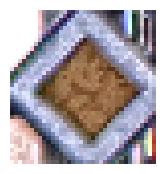

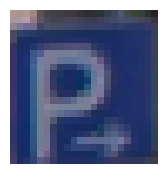

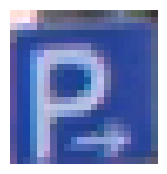

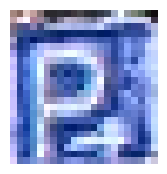

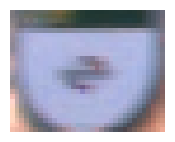

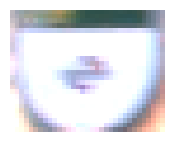

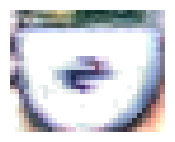

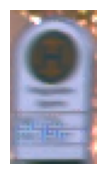

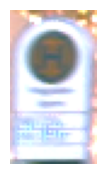

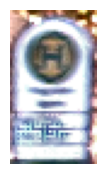

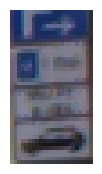

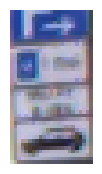

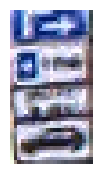


0: 384x640 6 Traffic signs, 21.0ms
Speed: 2.5ms preprocess, 21.0ms inference, 8.1ms postprocess per image at shape (1, 3, 384, 640)
1/1 [==============================] - 0s 159ms/step


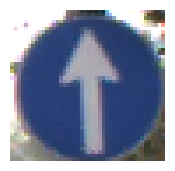

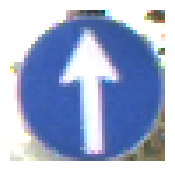

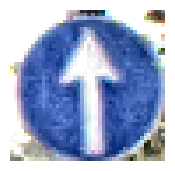

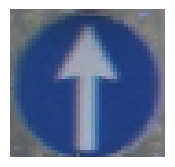

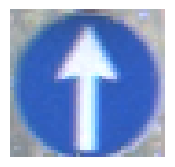

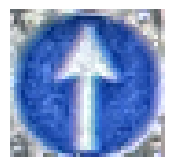

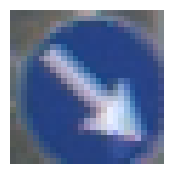

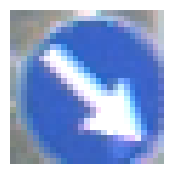

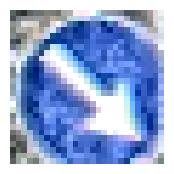

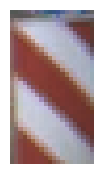

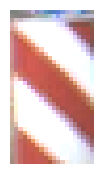

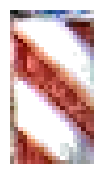

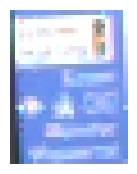

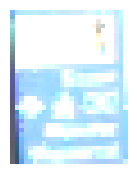

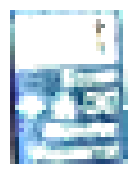

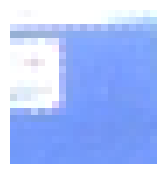

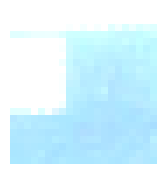

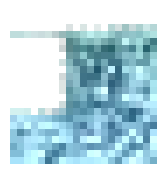


0: 384x640 2 Traffic signs, 22.3ms
Speed: 2.7ms preprocess, 22.3ms inference, 14.9ms postprocess per image at shape (1, 3, 384, 640)
1/1 [==============================] - 0s 171ms/step


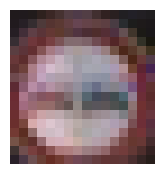

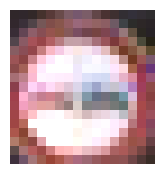

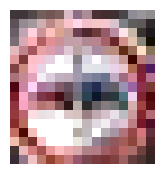

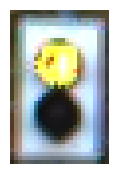

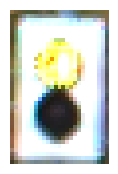

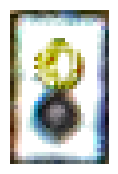


0: 384x640 3 Traffic signs, 17.8ms
Speed: 2.2ms preprocess, 17.8ms inference, 22.9ms postprocess per image at shape (1, 3, 384, 640)
1/1 [==============================] - 0s 174ms/step


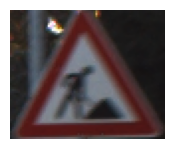

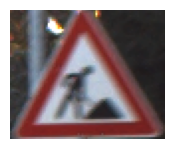

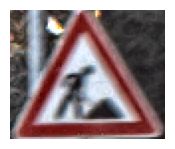

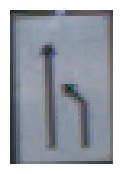

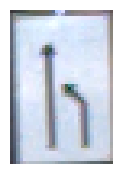

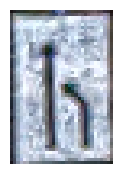

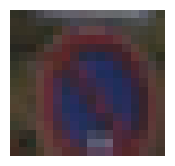

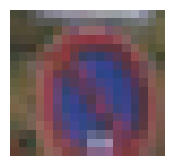

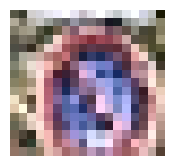


0: 384x640 4 Traffic signs, 25.0ms
Speed: 2.7ms preprocess, 25.0ms inference, 10.0ms postprocess per image at shape (1, 3, 384, 640)
1/1 [==============================] - 0s 150ms/step


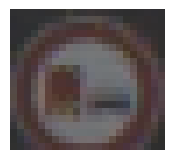

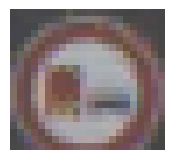

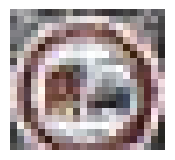

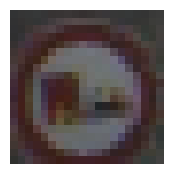

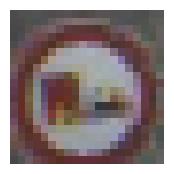

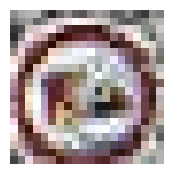

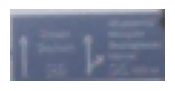

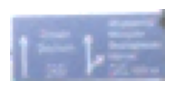

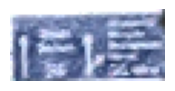


0: 384x640 2 Traffic signs, 17.6ms
Speed: 2.2ms preprocess, 17.6ms inference, 6.8ms postprocess per image at shape (1, 3, 384, 640)
1/1 [==============================] - 0s 196ms/step


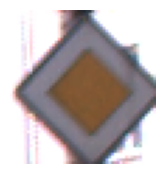

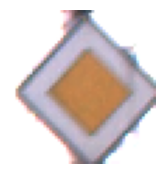

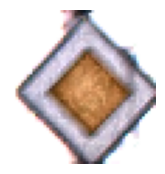


0: 384x640 5 Traffic signs, 18.7ms
Speed: 2.1ms preprocess, 18.7ms inference, 20.3ms postprocess per image at shape (1, 3, 384, 640)
1/1 [==============================] - 0s 158ms/step


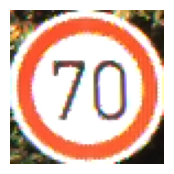

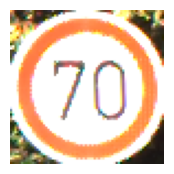

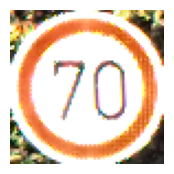

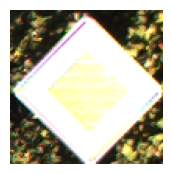

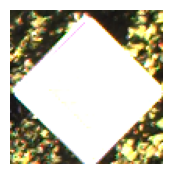

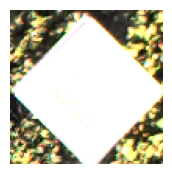

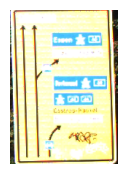

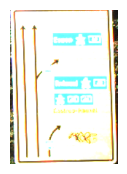

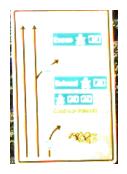

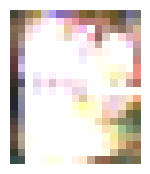

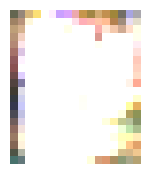

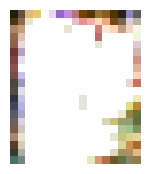

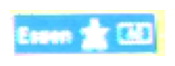

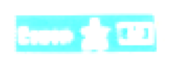

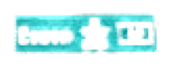


0: 384x640 2 Traffic signs, 21.1ms
Speed: 2.4ms preprocess, 21.1ms inference, 15.3ms postprocess per image at shape (1, 3, 384, 640)
1/1 [==============================] - 0s 168ms/step


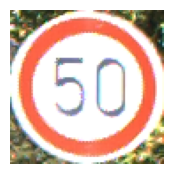

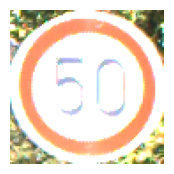

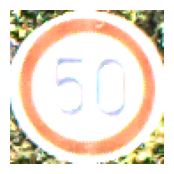

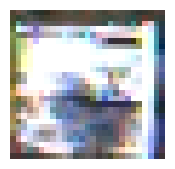

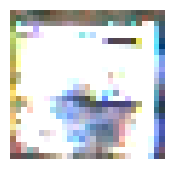

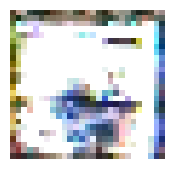


0: 384x640 2 Traffic signs, 19.4ms
Speed: 2.4ms preprocess, 19.4ms inference, 6.9ms postprocess per image at shape (1, 3, 384, 640)
1/1 [==============================] - 1s 1s/step


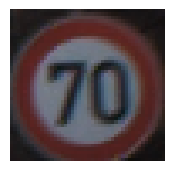

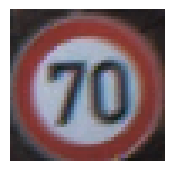

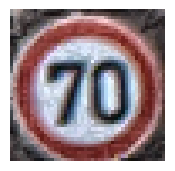

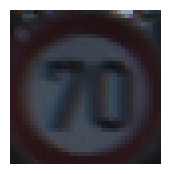

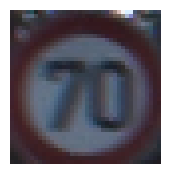

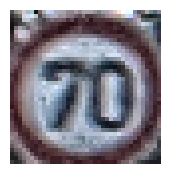


0: 384x640 2 Traffic signs, 50.7ms
Speed: 2.4ms preprocess, 50.7ms inference, 21.8ms postprocess per image at shape (1, 3, 384, 640)
1/1 [==============================] - 0s 176ms/step


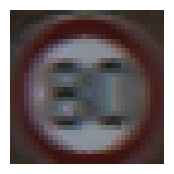

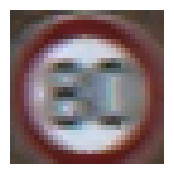

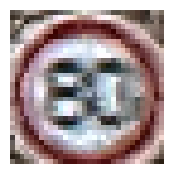

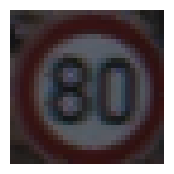

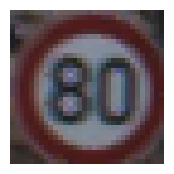

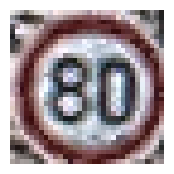


0: 384x640 (no detections), 22.5ms
Speed: 1.8ms preprocess, 22.5ms inference, 2.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 3 Traffic signs, 18.0ms
Speed: 2.2ms preprocess, 18.0ms inference, 14.2ms postprocess per image at shape (1, 3, 384, 640)
1/1 [==============================] - 0s 225ms/step


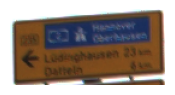

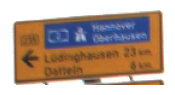

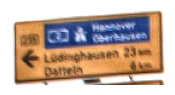

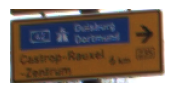

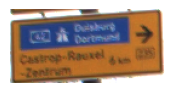

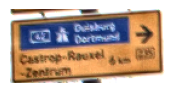

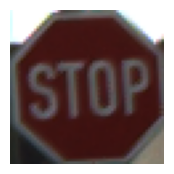

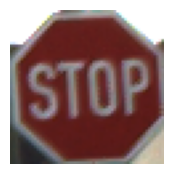

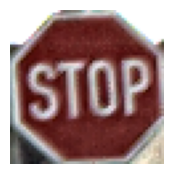


0: 384x640 12 Traffic signs, 19.4ms
Speed: 1.7ms preprocess, 19.4ms inference, 13.0ms postprocess per image at shape (1, 3, 384, 640)
1/1 [==============================] - 0s 167ms/step


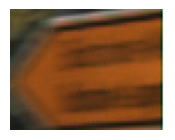

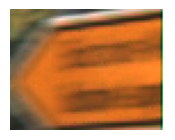

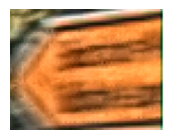

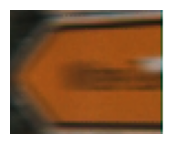

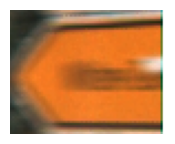

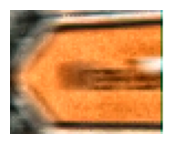

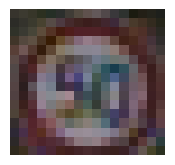

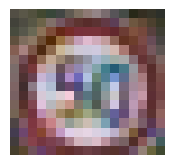

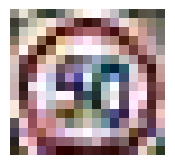

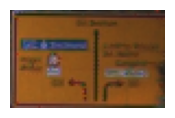

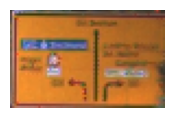

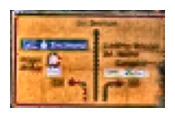

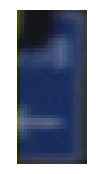

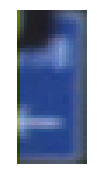

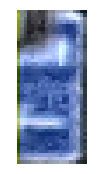

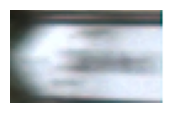

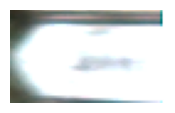

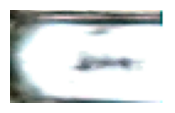

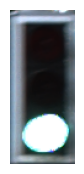

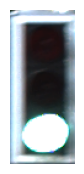

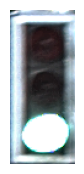

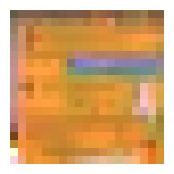

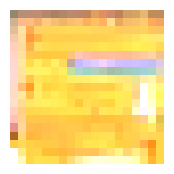

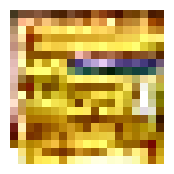

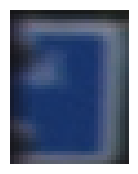

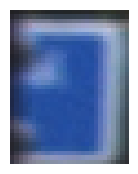

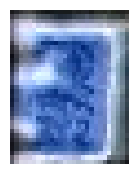

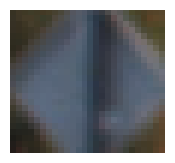

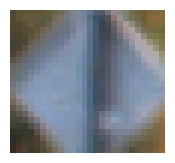

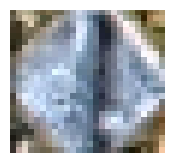

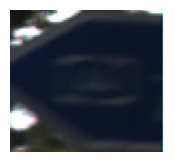

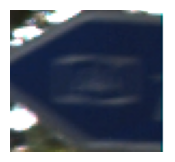

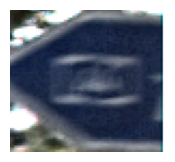


0: 384x640 2 Traffic signs, 25.7ms
Speed: 2.2ms preprocess, 25.7ms inference, 21.4ms postprocess per image at shape (1, 3, 384, 640)
1/1 [==============================] - 0s 175ms/step


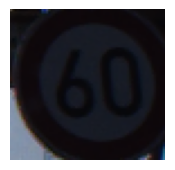

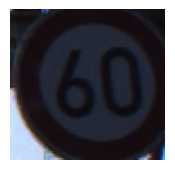

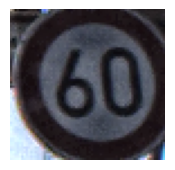


0: 384x640 (no detections), 19.1ms
Speed: 2.0ms preprocess, 19.1ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 5 Traffic signs, 18.2ms
Speed: 2.0ms preprocess, 18.2ms inference, 14.3ms postprocess per image at shape (1, 3, 384, 640)
1/1 [==============================] - 0s 174ms/step


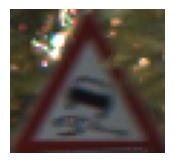

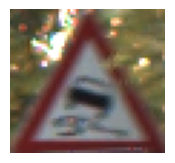

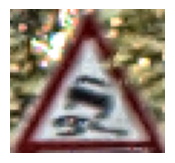

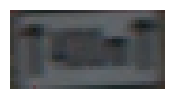

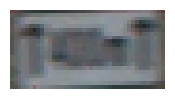

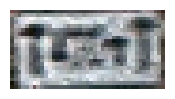

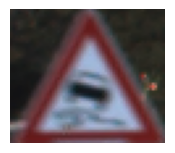

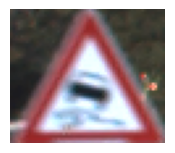

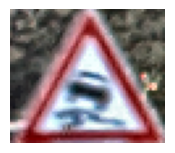

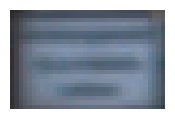

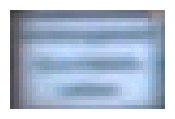

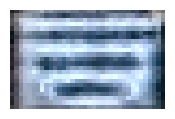

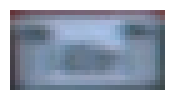

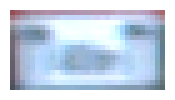

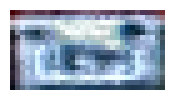


0: 384x640 7 Traffic signs, 18.0ms
Speed: 2.0ms preprocess, 18.0ms inference, 16.8ms postprocess per image at shape (1, 3, 384, 640)
1/1 [==============================] - 0s 167ms/step


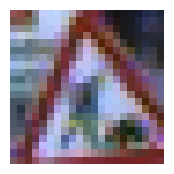

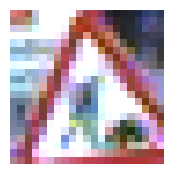

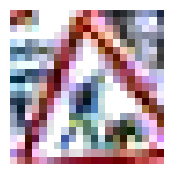

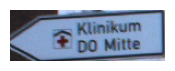

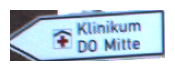

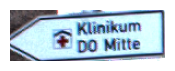

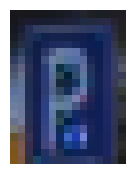

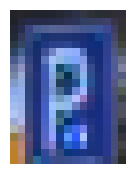

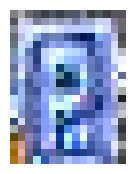

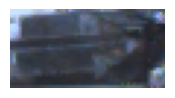

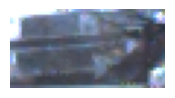

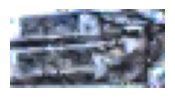

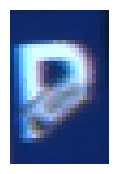

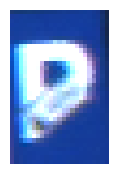

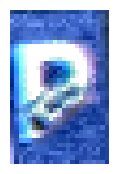

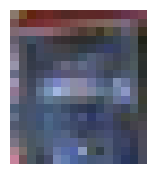

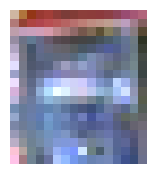

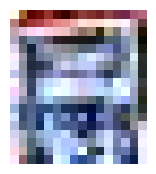


0: 384x640 4 Traffic signs, 20.7ms
Speed: 1.8ms preprocess, 20.7ms inference, 19.9ms postprocess per image at shape (1, 3, 384, 640)
1/1 [==============================] - 0s 207ms/step


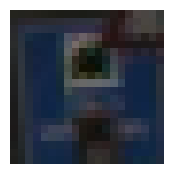

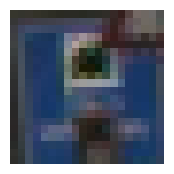

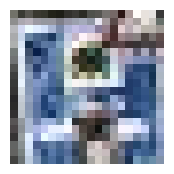

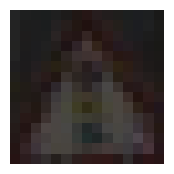

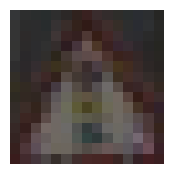

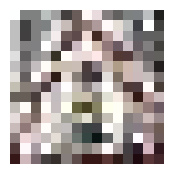

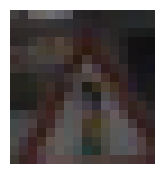

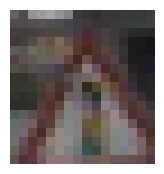

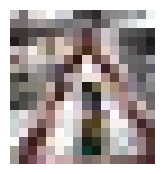

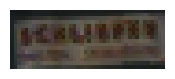

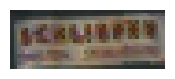

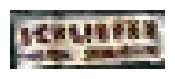


0: 384x640 3 Traffic signs, 18.6ms
Speed: 2.3ms preprocess, 18.6ms inference, 7.9ms postprocess per image at shape (1, 3, 384, 640)
1/1 [==============================] - 0s 160ms/step


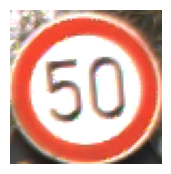

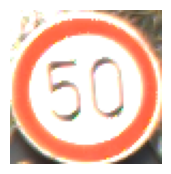

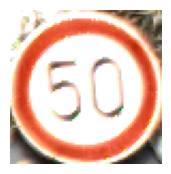

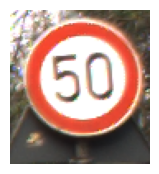

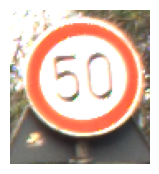

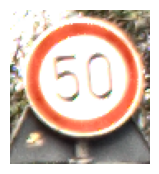


0: 384x640 (no detections), 20.0ms
Speed: 2.3ms preprocess, 20.0ms inference, 2.5ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 Traffic signs, 23.6ms
Speed: 2.2ms preprocess, 23.6ms inference, 17.7ms postprocess per image at shape (1, 3, 384, 640)
1/1 [==============================] - 0s 199ms/step


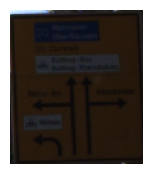

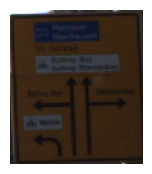

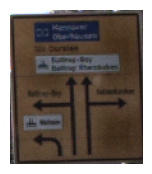

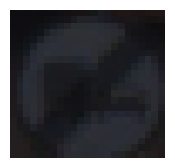

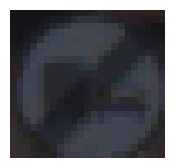

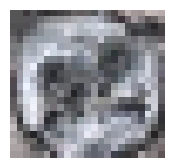


0: 384x640 2 Traffic signs, 27.1ms
Speed: 3.0ms preprocess, 27.1ms inference, 10.3ms postprocess per image at shape (1, 3, 384, 640)
1/1 [==============================] - 0s 200ms/step


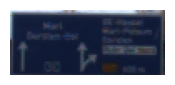

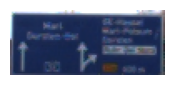

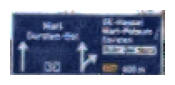


0: 384x640 3 Traffic signs, 19.2ms
Speed: 2.8ms preprocess, 19.2ms inference, 16.0ms postprocess per image at shape (1, 3, 384, 640)
1/1 [==============================] - 0s 172ms/step


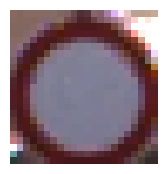

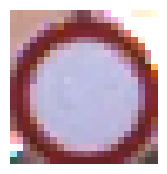

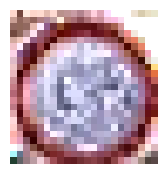


0: 384x640 3 Traffic signs, 18.5ms
Speed: 1.9ms preprocess, 18.5ms inference, 7.1ms postprocess per image at shape (1, 3, 384, 640)
1/1 [==============================] - 0s 185ms/step


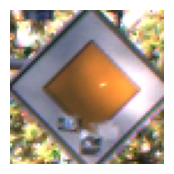

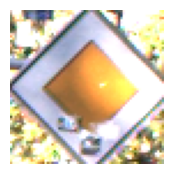

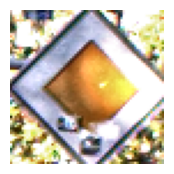

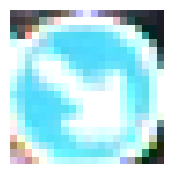

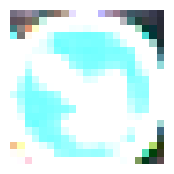

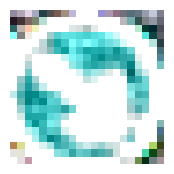

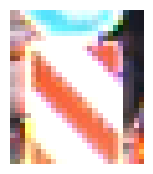

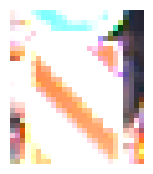

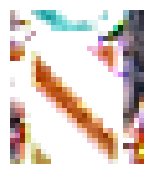


0: 384x640 4 Traffic signs, 19.4ms
Speed: 2.9ms preprocess, 19.4ms inference, 7.5ms postprocess per image at shape (1, 3, 384, 640)
1/1 [==============================] - 0s 161ms/step


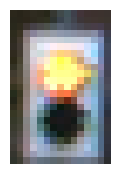

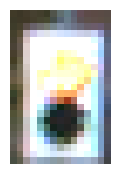

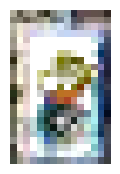

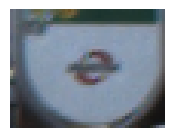

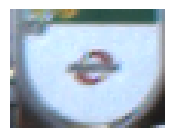

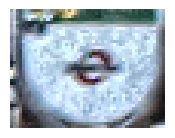

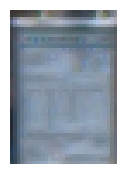

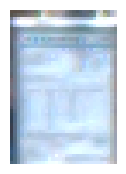

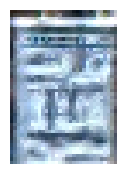


0: 384x640 2 Traffic signs, 19.0ms
Speed: 3.1ms preprocess, 19.0ms inference, 8.9ms postprocess per image at shape (1, 3, 384, 640)
1/1 [==============================] - 0s 198ms/step


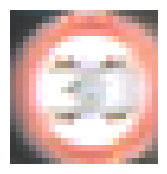

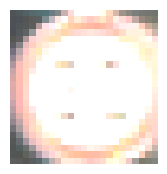

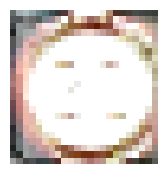

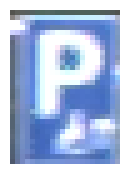

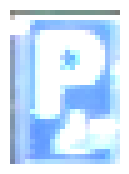

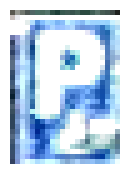


0: 384x640 4 Traffic signs, 23.9ms
Speed: 2.1ms preprocess, 23.9ms inference, 16.1ms postprocess per image at shape (1, 3, 384, 640)
1/1 [==============================] - 0s 186ms/step


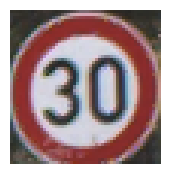

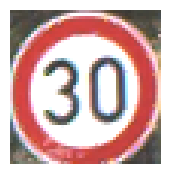

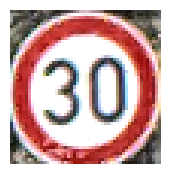

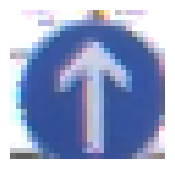

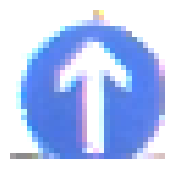

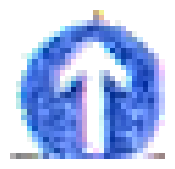

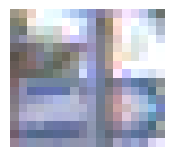

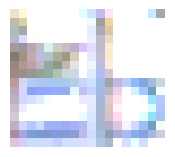

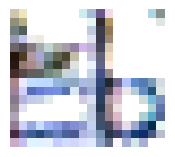


0: 384x640 6 Traffic signs, 23.6ms
Speed: 2.0ms preprocess, 23.6ms inference, 8.4ms postprocess per image at shape (1, 3, 384, 640)
1/1 [==============================] - 0s 218ms/step


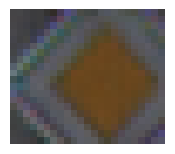

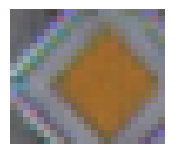

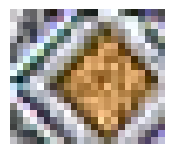

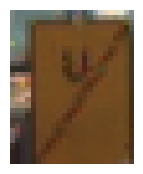

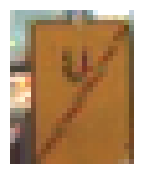

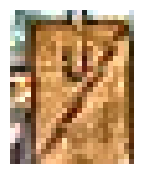

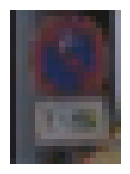

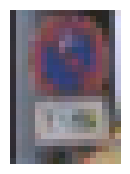

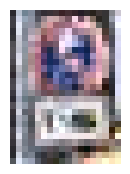


0: 384x640 (no detections), 19.7ms
Speed: 2.3ms preprocess, 19.7ms inference, 2.4ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 2 Traffic signs, 19.6ms
Speed: 1.9ms preprocess, 19.6ms inference, 13.6ms postprocess per image at shape (1, 3, 384, 640)
1/1 [==============================] - 0s 166ms/step


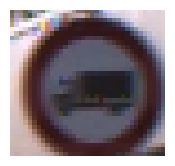

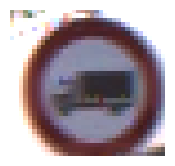

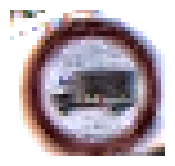

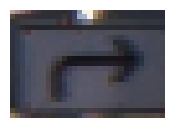

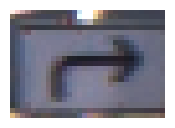

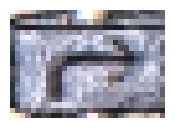


0: 384x640 1 Traffic sign, 19.4ms
Speed: 2.3ms preprocess, 19.4ms inference, 8.3ms postprocess per image at shape (1, 3, 384, 640)
1/1 [==============================] - 0s 289ms/step


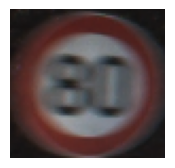

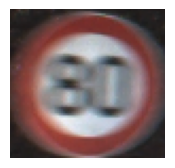

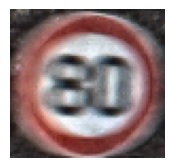

KeyboardInterrupt: 

In [41]:
run_from_folder_contrast(DIR_TEST_IMAGES, detector, classifier)